

# **Congressional Resignations Over Time**




Bridget Grossman

https://github.com/bgg999/bgg999.github.io

---



#Project Goals

The project goal is to investigate the congressional resignations data. I want to see how it has changed over time and how it differes between parties. I am also interested in the scandals. How common they are and if they've chagned over time.

#ETL

I found this data from the fivethirtyeight github site (https://github.com/fivethirtyeight/data/tree/master/congress-resignations). It was used in this article: https://fivethirtyeight.com/features/more-people-are-resigning-from-congress-than-at-any-time-in-recent-history/. The data contains informaton on all congress member resignations from 1901 to 2018. The data contains 615 entries. The data was pretty tidy to begin with, so there was not much I had to do. I checked that all of the variables had the correct dtype, and there was one that didn't so I fixed it.

In [85]:
%cd /content
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
congressional_resignations_df = pd.read_csv("/content/drive/MyDrive/CS_Project/congressional_resignations.csv")

congressional_resignations_df.head()

congressional_resignations_df["Party"].describe()

congressional_resignations_df["Category"].describe()

congressional_resignations_df["Member"].describe()

congressional_resignations_df["District"].describe()

congressional_resignations_df["Resignation Date"].describe()

congressional_resignations_df["Resignation Date"] = pd.to_datetime(congressional_resignations_df["Resignation Date"])



/content


I also made the categories easier to understand.

In [86]:
congressional_resignations_tidy_df = congressional_resignations_df.copy()

congressional_resignations_tidy_df["Category"] = congressional_resignations_tidy_df["Category"].str.strip()


congressional_resignations_tidy_df["Category"] = congressional_resignations_tidy_df["Category"].map({
    "X":"Unwanted sexual contact",
    "A":"Consensual sex scandals",
    "B":"Other scandals",
    "C":"Other office",
    "D":"Private sector",
    "E":"Health/family",
    "F":"Other",
    "G":"Left early",
    "H":"Military service",
    "I":"Election overturned",
    "C & F": "Other office and Other",
    "B & C" : "Other scandals and Other office",
    "B & D": "Other scandals and Private sector",
    "B & G": "Other scandals and Left early",
    "B & E": "Other scandals and Health/Family",
    "D & F": "Private sector and Other",
    "D & G": "Private sector and Left early",
    "D & E": "Private sector and Health/Family",
    "E & F": "Health/Family and Other",
    "E & G": "Health/Family and Left early",
    "F & G": "Other and Left early",
}).fillna("Unknown Category")

congressional_resignations_tidy_df["Category"]

congressional_resignations_tidy_df.head()



,Member,Party,District,Congress,Resignation Date,Reason,Source,Category
0,Pat Tiberi,R,OH-12,115th,2018-01-15,Took a job with the Ohio Business Roundtable,New York Times,Private sector
1,Al Franken,D,MN-SEN,115th,2018-01-02,Sexual harassment/groping/unwanted kissing,Minneapolis Star Tribune,Unwanted sexual contact
2,Trent Franks,R,AZ-08,115th,2017-12-08,Sexual harassment/surrogacy pressure,CNN,Unwanted sexual contact
3,John Conyers,D,MI-13,115th,2017-12-05,Sexual harassment/inappropriate touching,Washington Post,Unwanted sexual contact
4,Tim Murphy,R,PA-18,115th,2017-10-21,Extramarital affair/abortion hypocrisy,POLITICO,Consensual sex scandals


#EDA

258/615 resignations have been Republican, and 357/615 have been Democrats. Part of what I was interested in was the difference between political parties. This shows me that democrats have around 100 more resignations since 1901 than republicans.

In [87]:
congressional_resignations_tidy_df[congressional_resignations_df["Party"] == "R"]
congressional_resignations_tidy_df[congressional_resignations_df["Party"] == "R"]["Party"].value_counts()

#258 Republicans have resigned

congressional_resignations_tidy_df[congressional_resignations_df["Party"] == "D"]
congressional_resignations_tidy_df[congressional_resignations_df["Party"] == "D"]["Party"].value_counts()

#357 Democrats have resigned


,count
Party,
D,357


357 resignations were because the congressperson was moving to another office. This was the most common reason for resigning. THe next most common category was leaving early. Other scandals appeared 30 times, unwanted sexual contact appeared 8 times, consensual sex scandals also appeared 8 times. Looking at the value counts of the categories allows me to get to know the data better and look at what is common and what is not common. I get to see how many times each of the scandalous categories appeared. This can help me answer my questions.

In [88]:
congressional_resignations_tidy_df["Category"].value_counts()

,count
Category,
Other office,357
Left early,87
Private sector,50
Other scandals,30
Election overturned,20
Health/family,15
Military service,13
Other,10
Unwanted sexual contact,8


Of the 8 resignations that were due to unwanted sexual contact, 5 were from democrats, and 3 were from republicans.

In [89]:
congressional_resignations_tidy_df[(congressional_resignations_tidy_df["Party"] == "R") & (congressional_resignations_tidy_df["Category"] == "Unwanted sexual contact")]
congressional_resignations_tidy_df[(congressional_resignations_tidy_df["Party"] == "D") & (congressional_resignations_tidy_df["Category"] == "Unwanted sexual contact")]


,Member,Party,District,Congress,Resignation Date,Reason,Source,Category
1,Al Franken,D,MN-SEN,115th,2018-01-02,Sexual harassment/groping/unwanted kissing,Minneapolis Star Tribune,Unwanted sexual contact
3,John Conyers,D,MI-13,115th,2017-12-05,Sexual harassment/inappropriate touching,Washington Post,Unwanted sexual contact
39,David Wu,D,OR-01,112th,2011-08-03,Sexual harassment/sex with teenage girl,The Oregonian,Unwanted sexual contact
48,Eric Massa,D,NY-29,111th,2010-03-08,Sexual harassment/groping (same-sex),The Week,Unwanted sexual contact
105,Mel Reynolds,D,IL-02,104th,1995-10-01,Convicted of sex with 16-year-old girl,New York Times,Unwanted sexual contact


I made a bar chart with the different categories and the amount of times each one appeared. I used the slightly less tidy data, with the letters for the category labels because it made coding the chart easier for me. This chart helps you visualise which categories are more common.

Text(0, 0.5, 'Number of Resignations')

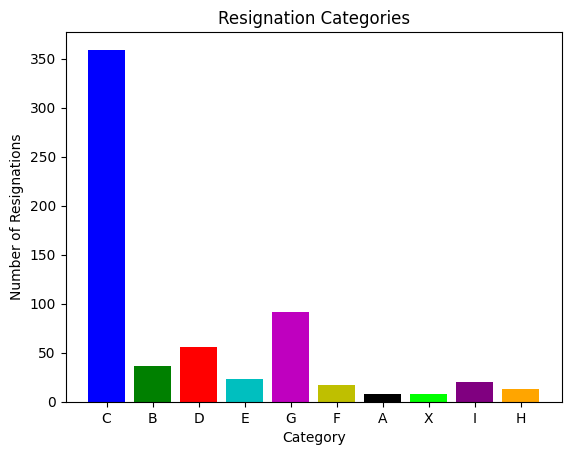

In [90]:
congressional_resignations_df["Category"] = congressional_resignations_df["Category"].str.strip()

cat_c = (congressional_resignations_df["Category"] == "C") |(congressional_resignations_df["Category"] == "C & F") | (congressional_resignations_df["Category"] == "B & C")

cat_b = (congressional_resignations_df["Category"] == "B") |(congressional_resignations_df["Category"] == "B & D") | (congressional_resignations_df["Category"] == "B & G")| (congressional_resignations_df["Category"] == "B & E")| (congressional_resignations_df["Category"] == "B & C")

cat_d = (congressional_resignations_df["Category"] == "D") |(congressional_resignations_df["Category"] == "D & F") | (congressional_resignations_df["Category"] == "D & G") | (congressional_resignations_df["Category"] == "B & D") | (congressional_resignations_df["Category"] == "D & E")

cat_e = (congressional_resignations_df["Category"] == "E") |(congressional_resignations_df["Category"] == "E & F") | (congressional_resignations_df["Category"] == "E & G") | (congressional_resignations_df["Category"] == "B & E") | (congressional_resignations_df["Category"] == "D & E")

cat_g = (congressional_resignations_df["Category"] == "G") | (congressional_resignations_df["Category"] == "F & G")| (congressional_resignations_df["Category"] == "E & G")| (congressional_resignations_df["Category"] == "B & G") | (congressional_resignations_df["Category"] == "D & G")

cat_f = (congressional_resignations_df["Category"] == "F") |(congressional_resignations_df["Category"] == "F & G") | (congressional_resignations_df["Category"] == "E & F") | (congressional_resignations_df["Category"] == "D & F") | (congressional_resignations_df["Category"] == "C & F")

cat_c_counts = cat_c.sum()

cat_b_counts = cat_b.sum()
cat_d_counts = cat_d.sum()

cat_e_counts = cat_e.sum()

cat_g_counts = cat_g.sum()

cat_f_counts = cat_f.sum()

cat_x_counts = (congressional_resignations_df["Category"] == "X").sum()

cat_i_counts = (congressional_resignations_df["Category"] == "I").sum()

cat_h_counts = (congressional_resignations_df["Category"] == "H").sum()
cat_a_counts = (congressional_resignations_df["Category"] == "A").sum()


categories = ["C", "B", "D", "E", "G", "F", "A", "X", "I", "H"]
counts = [cat_c_counts, cat_b_counts, cat_d_counts, cat_e_counts, cat_g_counts, cat_f_counts, cat_a_counts, cat_x_counts, cat_i_counts, cat_h_counts]

colors = ["b", "g", "r", "c", "m", "y", "k", "lime", "purple", "orange"]

plt.bar(categories, counts, color = colors)
plt.title("Resignation Categories")
plt.xlabel("Category")
plt.ylabel("Number of Resignations")



I also made a chart that shows how resignations changed over time. The chart shows that there was a large a large amount of resignations at around mid-1970's. This chart shows me how the amount of resignations has changed over time.

Text(0, 0.5, 'Number of Resignations')

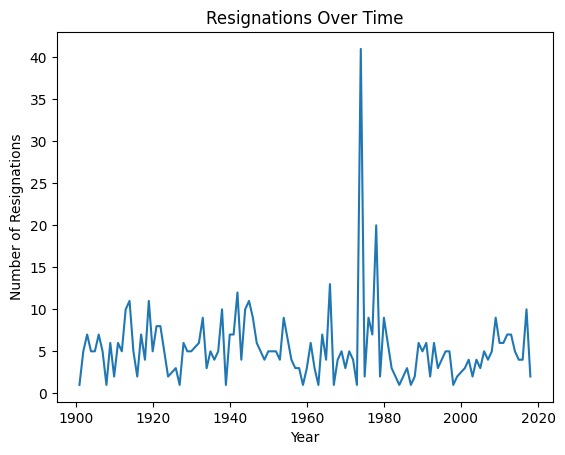

In [92]:
congressional_resignations_df["Resignation Year"] = congressional_resignations_df["Resignation Date"].dt.year
congressional_resignations_df["Resignation Year"] = pd.to_numeric(congressional_resignations_df["Resignation Year"])
year_counts = congressional_resignations_df["Resignation Year"].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values)
plt.title("Resignations Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Resignations")

In [93]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/Colab_Notebooks/CS_Project.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/CS_Project.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 359949 bytes to /content/drive/MyDrive/Colab_Notebooks/CS_Project.html
